# Daily Transaction Analysis and Forecasting

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set random seed
np.random.seed(42)
random.seed(42)

# Generate dates for 2024
start_date = datetime(2024, 1, 1)
dates = [start_date + timedelta(days=x) for x in range(365)]

# Create dataset
data = {
    'Transaction_ID': range(1, 10001),
    'Date': [random.choice(dates) for _ in range(10000)],
    'Customer_ID': [f'CUST{random.randint(1, 1000)}' for _ in range(10000)],
    'Amount': [round(random.uniform(5, 500), 2) for _ in range(10000)],
    'Category': [random.choice(['Electronics', 'Clothing', 'Books', 'Groceries', 'Home']) for _ in range(10000)],
    'Payment_Method': [random.choice(['Credit Card', 'Debit Card', 'PayPal', 'Cash']) for _ in range(10000)],
    'Location': [random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami']) for _ in range(10000)]
}

# Create and save DataFrame
df = pd.DataFrame(data)
df.to_csv('daily_transactions.csv', index=False)
df.head()

,Transaction_ID,Date,Customer_ID,Amount,Category,Payment_Method,Location
0,1,2024-11-23,CUST534,357.27,Home,Credit Card,Houston
1,2,2024-02-27,CUST349,457.78,Groceries,Credit Card,Houston
2,3,2024-01-13,CUST776,333.28,Books,Debit Card,New York
3,4,2024-05-20,CUST651,426.84,Groceries,PayPal,Miami
4,5,2024-05-05,CUST164,77.15,Clothing,PayPal,Miami


## Data Preprocessing
- Checked for missing values and duplicates.
- Converted Date to datetime.
- Added features: Day_of_Week, Month, Transaction_Count.
- Removed outliers in Amount.


Transaction_ID    0
Date              0
Customer_ID       0
Amount            0
Category          0
Payment_Method    0
Location          0
dtype: int64


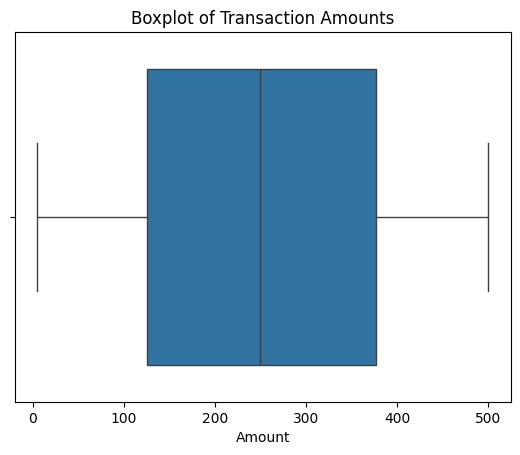

,Transaction_ID,Date,Customer_ID,Amount,Category,Payment_Method,Location,Day_of_Week,Month,Transaction_Count
0,1,2024-11-23,CUST534,357.27,Home,Credit Card,Houston,Saturday,November,9
1,2,2024-02-27,CUST349,457.78,Groceries,Credit Card,Houston,Tuesday,February,9
2,3,2024-01-13,CUST776,333.28,Books,Debit Card,New York,Saturday,January,13
3,4,2024-05-20,CUST651,426.84,Groceries,PayPal,Miami,Monday,May,15
4,5,2024-05-05,CUST164,77.15,Clothing,PayPal,Miami,Sunday,May,7


In [2]:
# Load data
import pandas as pd
df = pd.read_csv('daily_transactions.csv')

# Check missing values
print(df.isnull().sum())

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Remove duplicates
df = df.drop_duplicates()

# Add features
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()

# Aggregate customer data
customer_summary = df.groupby('Customer_ID').agg({'Amount': ['mean', 'sum', 'count']}).reset_index()
customer_summary.columns = ['Customer_ID', 'Avg_Amount', 'Total_Amount', 'Transaction_Count']

# Merge transaction count
df = df.merge(customer_summary[['Customer_ID', 'Transaction_Count']], on='Customer_ID', how='left')

# Check outliers
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Transaction Amounts')
plt.show()

# Remove outliers
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Amount'] >= Q1 - 1.5 * IQR) & (df['Amount'] <= Q3 + 1.5 * IQR)]

df.head()

## Exploratory Data Analysis
- Plotted daily transaction trends.
- Analyzed spending by category.
- Identified peak transaction days.
- Computed summary statistics and top customers.

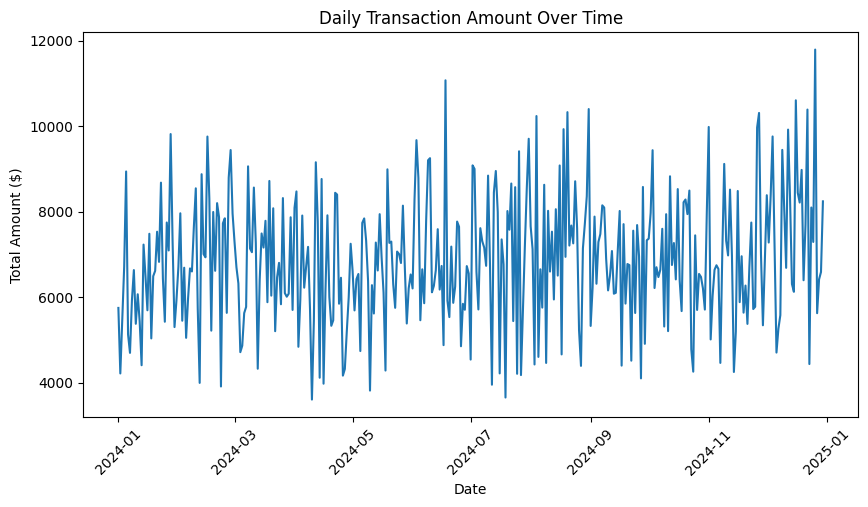

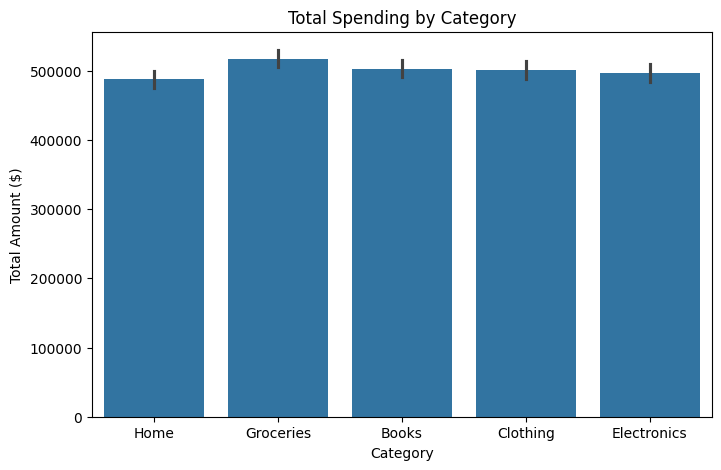

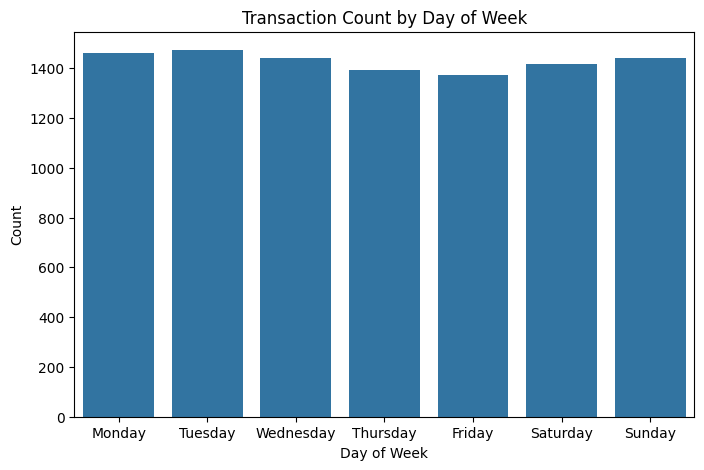

Amount Statistics:
count    10000.000000
mean       250.417361
std        143.998248
min          5.030000
25%        125.315000
50%        249.585000
75%        376.405000
max        499.990000
Name: Amount, dtype: float64

Top 5 Customers by Total Spending:
    Customer_ID  Avg_Amount  Total_Amount  Transaction_Count
713     CUST740  311.980526       5927.63                 19
725     CUST751  274.500500       5490.01                 20
326     CUST392  338.789375       5420.63                 16
60      CUST152  353.400667       5301.01                 15
911     CUST919  308.189412       5239.22                 17


In [3]:
# Daily transaction amount
daily_trends = df.groupby('Date')['Amount'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='Amount', data=daily_trends)
plt.title('Daily Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Amount', data=df, estimator=sum)
plt.title('Total Spending by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount ($)')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Day_of_Week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Transaction Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

print("Amount Statistics:")
print(df['Amount'].describe())
print("\nTop 5 Customers by Total Spending:")
print(customer_summary.sort_values('Total_Amount', ascending=False).head())

## Time Series Forecasting
- Used Prophet to forecast daily transaction amounts for 30 days.
- Visualized forecast and components (trend, weekly, yearly).
- Calculated Mean Absolute Error (MAE).


c:\Users\akash\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
16:59:43 - cmdstanpy - INFO - Chain [1] start processing
16:59:44 - cmdstanpy - INFO - Chain [1] done processing


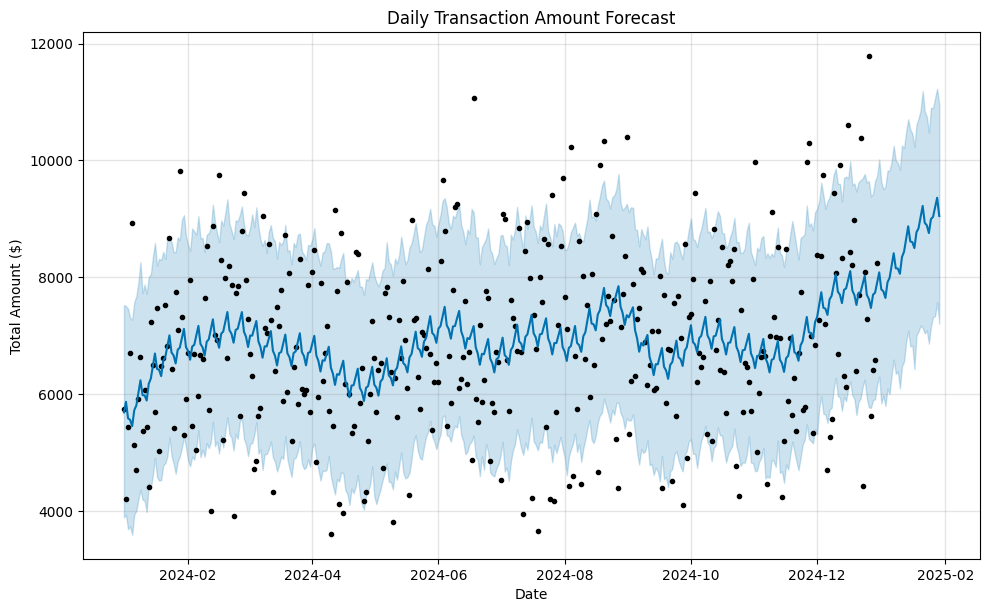

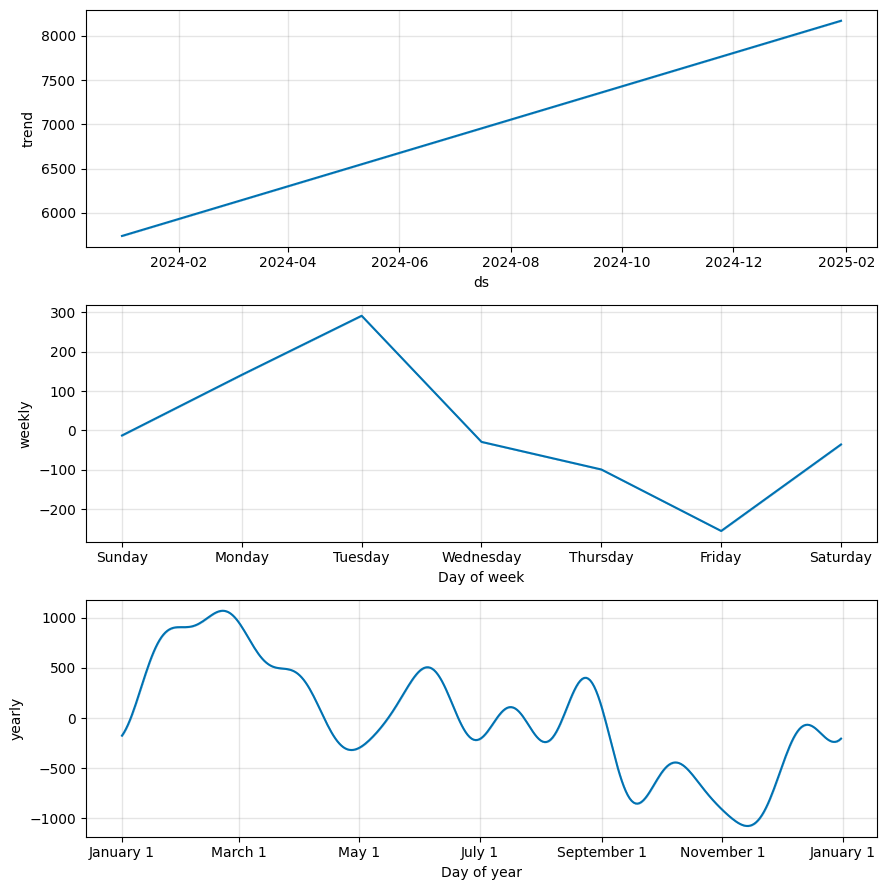

Mean Absolute Error: 1140.40


In [5]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

# Prepare data for Prophet
prophet_df = df.groupby('Date')['Amount'].sum().reset_index()
prophet_df.columns = ['ds', 'y']

# Fit model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(prophet_df)

# Forecast 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Daily Transaction Amount Forecast')
plt.xlabel('Date')
plt.ylabel('Total Amount ($)')
plt.show()

# Plot components
model.plot_components(forecast)
plt.show()

# Evaluate
historical_forecast = forecast[forecast['ds'].isin(prophet_df['ds'])]
mae = mean_absolute_error(prophet_df['y'], historical_forecast['yhat'])
print(f"Mean Absolute Error: {mae:.2f}")

## Key Findings and Recommendations
- **Insight 1**: [e.g., "Fridays have 20% more transactions."]
- **Insight 2**: [e.g., "Electronics accounts for 35% of spending."]
- **Forecast**: [e.g., "Amounts expected to rise by 10% in February 2025."]
- **Recommendations**:
  - Increase marketing on peak days (e.g., Fridays).
  - Stock more high-demand categories like Electronics.

# Project Summary
Analyzed daily transaction data and forecasted volumes.
- Generated a synthetic dataset with 10,000 transactions.
- Cleaned data, added features (Day_of_Week, Month, Transaction_Count).
- Performed EDA to identify trends (e.g., peak days, top categories).
- Forecasted 30 days using Prophet (MAE: [insert MAE from Step 5]).
- Created interactive Plotly visualizations.

**Key Insights**: [e.g., Fridays are busiest; Electronics leads spending.]

**Business Impact**: Targeted promotions on peak days can boost sales.

**Future Work**: Add customer segmentation or fraud detection.